In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
fnames = !ls members_*.csv
df = pd.concat(
    [pd.read_csv(fname, index_col=0) for fname in fnames]
)

In [4]:
print('Total users', len(df))
df = df.drop_duplicates(subset='id')
print('Total uniq users', len(df.id.unique()))

Total users 80923
Total uniq users 70966


In [5]:
df['is_male'] = df['sex'].map({0: pd.NA, 1: 'Ж', 2: 'М'}) 

In [6]:
# df.to_csv('all_users_2020feb15.csv')

In [7]:
df[['first_name', 'sex', 'is_male']].head()

,first_name,sex,is_male
0,Jullich,1,Ж
1,Elena,1,Ж
2,Tonya,1,Ж
3,Evgenia,1,Ж
4,Katya,1,Ж


In [85]:
df['is_male'].value_counts()

Ж    63532
М     7425
Name: is_male, dtype: int64

In [86]:
63532 / (63532 + 7425)

0.8953591611821243

Text(0.5, 1.0, '89% подписчиков -- женщины')

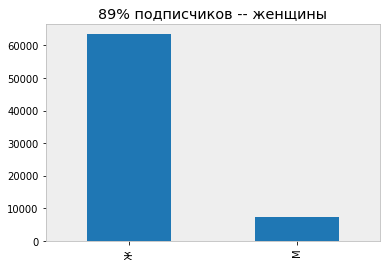

In [8]:
df['is_male'].value_counts().plot(kind='bar')
plt.grid(False)
plt.title('89% подписчиков -- женщины')

In [9]:
import pendulum

In [10]:
from datetime import datetime as dt

In [11]:
dt.strptime('26.4.1983', '%d.%m.%Y')

datetime.datetime(1983, 4, 26, 0, 0)

In [12]:
today = dt.today()

def to_years(row):
    born = dt.strptime(row['bdate'], '%d.%m.%Y')
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [13]:
from scipy.stats import norm

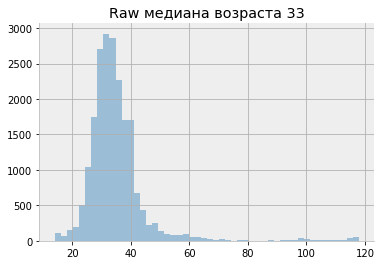

In [14]:
years = df[df['bdate'].str.len() > 5].apply(to_years, axis=1)

sns.distplot(years, norm_hist=False, kde=False)
sns.despine()
plt.title(f'Raw медиана возраста {years.median():.0f}')
plt.show()

In [15]:
df[
    df['bdate'].str.len() > 5
].apply(to_years, axis=1)


3      36
5      30
7      32
8      34
11     36
       ..
663    36
665    38
666    29
670    38
671    28
Length: 20512, dtype: int64

In [16]:
years.mode()[0]

33

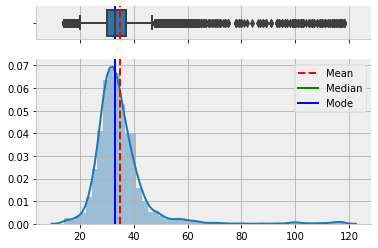

In [17]:
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}
)
mean = years.mean()
median = years.median()
mode = years.mode()[0]

sns.boxplot(years, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(years, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
sns.despine()
plt.show()

In [18]:
df[df['bdate'].str.len() > 5].apply(to_years, axis=1)

3      36
5      30
7      32
8      34
11     36
       ..
663    36
665    38
666    29
670    38
671    28
Length: 20512, dtype: int64

In [19]:
def to_datetime(row):
    return dt.strptime(row['bdate'], '%d.%m.%Y').year

df[df['bdate'].str.len() > 5].apply(to_datetime, axis=1).head()

3     1983
5     1989
7     1987
8     1985
11    1983
dtype: int64

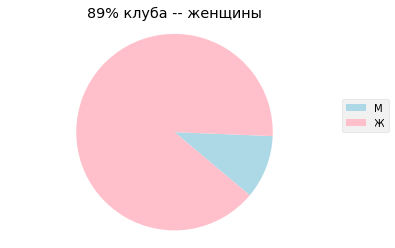

In [21]:
cnt_males = (df['sex'] == 2).sum()
cnt_fems = (df['sex'] == 1).sum()

labels = ["М", "Ж"]
sizes = [cnt_males, cnt_fems] # будет отмасштабировано
colors = ["lightblue", "pink"]

plt.pie(sizes, colors=colors, startangle=-40)
plt.axis("equal")
plt.legend(labels, loc=(1, 0.5))
plt.title("89% клуба -- женщины")
plt.show()

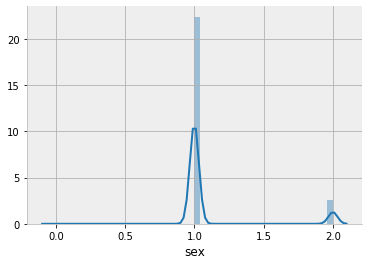

In [22]:
sns.distplot(df['sex'])
sns.despine()

In [23]:
sum(df['bdate'].isna())

23165

In [24]:
# sns.violinplot(data=df, y='sex', df['id'])

### Демографическая картина

In [25]:
from collections import defaultdict

In [26]:
today = dt(2020, 2, 15)

In [27]:
def get_age(bdate: str) -> int:
    born = dt.strptime(bdate, '%d.%m.%Y')
    age_raw = today.year - born.year
    age_corr = (today.month, today.day) < (born.month, born.day) 
    return age_raw - age_corr

In [45]:
df['education_status'].value_counts()

Alumna (Specialist)        2509
Student (Specialist)        705
Alumnus (Specialist)        296
Alumna (Bachelor's)         270
Alumna (Master's)           246
Student (Bachelor's)        227
Candidate of Sciences        57
Student (Master's)           47
PhD                          47
Alumnus (Master's)           46
Alumnus (Bachelor's)         39
Undergraduate applicant      36
Postgraduate Student         31
Intern                        2
Resident                      1
Name: education_status, dtype: int64

In [89]:
df['education_status'].value_counts().sum()

4559

In [28]:
mapping = defaultdict(int)

def has_upper_education(status):
    if pd.isna(status):
        return 0
    has_upper_education = any(
        status.startswith(cat)
        for cat in ('Alumn', 'Candidate', 'PhD')
    )
    return int(has_upper_education)

In [34]:
upper_edu_stats = [
    has_upper_education(s) for s in df['education_status'].values
]
upper_edu_stats = pd.Series(upper_edu_stats)

In [35]:
upper_edu_stats.value_counts()

0    67456
1     3510
dtype: int64

In [84]:
3510 / (67456 + 3150)

0.04971248902359573

In [36]:
def to_years_sex_edu(row):
    first = get_age(row['bdate'])
    second = row['sex']
    third = has_upper_education(row['education_status'])
    return pd.Series([first, second, third])

In [41]:
years_sex_edu = df[
    df['bdate'].str.len() > 5
].apply(to_years_sex_edu, axis=1)
years_sex_edu.columns = ['age', 'sex', 'has_upper_edu']

In [42]:
years_sex_edu.head()

,age,sex,has_upper_edu
3,36,1,0
5,30,1,0
7,32,1,0
8,34,1,1
11,36,2,1


In [44]:
years_sex_edu['sex_cat'] = (
    years_sex_edu['sex']
    .map({
        0: pd.NA,
        1: 'F',
        2: 'M'
    })
)

In [59]:
df_to_plot = years_sex_edu[years_sex_edu['age'] < 70]

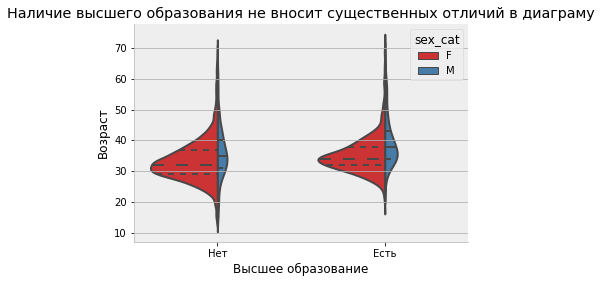

In [82]:

sns.violinplot(
    x='has_upper_edu',
    y='age',
    data=df_to_plot.dropna(),
    inner='quartile',
    scale='count',
    hue='sex_cat',
    split=True,
    palette="Set1",
    height=40
)
sns.despine()
plt.xticks([0, 1], ["Нет", "Есть"])
plt.xlabel("Высшее образование")
plt.ylabel("Возраст")
plt.title(' '.join([
    'Наличие высшего образования не вносит',
    'существенных отличий в диаграму',
]))
# plt.legend(["Жо", "Мэ"])
plt.show()